In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=30

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

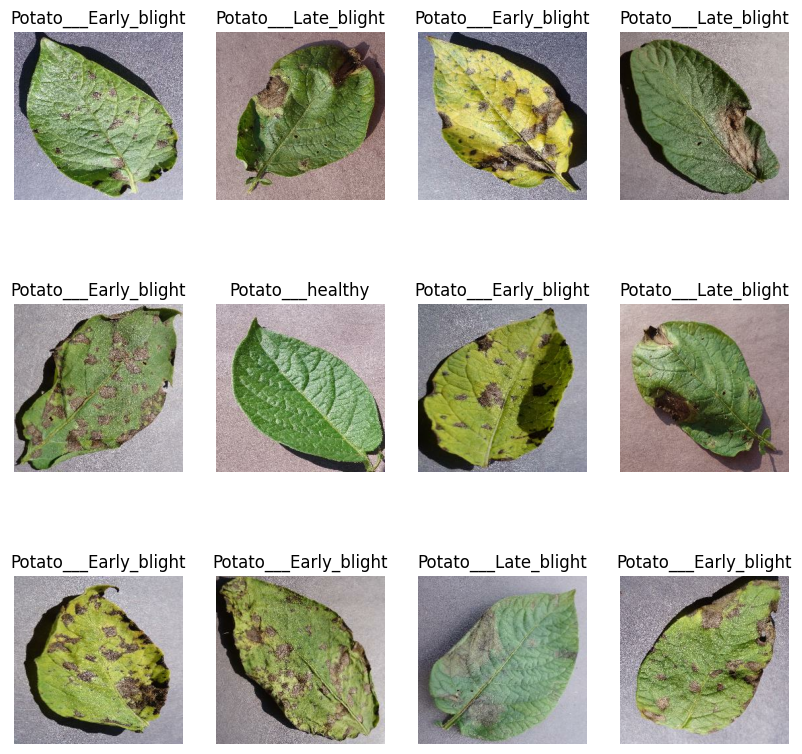

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
    #print(image_batch.shape)
    #print(label_batch.numpy())
        ax=plt.subplot(3,4,i+1)  
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])
    #print(image_batch[0].shape)

80%  ==> training


20%  ==>  10% validation, 10% test

In [7]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [8]:
train_ds=dataset.take(54)
len(train_ds)

54

In [9]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [10]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [11]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [12]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [13]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds) #68
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*ds_size)#54
    val_size=int(val_split*ds_size)#6
    
    train_ds = ds.take(train_size)#54
    val_ds=ds.skip(train_size).take(val_size)#6
    test_ds=ds.skip(train_size).skip(val_size)#8
    
    return train_ds,val_ds,test_ds

In [14]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [15]:
len(train_ds)

54

In [16]:
len(val_ds)

6

In [17]:
len(test_ds)

8

In [18]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [21]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    
])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [23]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [24]:
history = model.fit(train_ds,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=val_ds)

Epoch 1/30
54/54 [==============================] - 89s 2s/step - loss: 0.8945 - accuracy: 0.4994 - val_loss: 0.7727 - val_accuracy: 0.5781
Epoch 2/30
54/54 [==============================] - 83s 2s/step - loss: 0.6730 - accuracy: 0.6707 - val_loss: 0.3874 - val_accuracy: 0.8385
Epoch 3/30
54/54 [==============================] - 82s 2s/step - loss: 0.4317 - accuracy: 0.8131 - val_loss: 0.3628 - val_accuracy: 0.8802
Epoch 4/30
54/54 [==============================] - 85s 2s/step - loss: 0.2837 - accuracy: 0.8895 - val_loss: 0.7568 - val_accuracy: 0.7708
Epoch 5/30
54/54 [==============================] - 85s 2s/step - loss: 0.1535 - accuracy: 0.9398 - val_loss: 0.0785 - val_accuracy: 0.9792
Epoch 6/30
54/54 [==============================] - 85s 2s/step - loss: 0.1751 - accuracy: 0.9392 - val_loss: 0.1802 - val_accuracy: 0.9271
Epoch 7/30
54/54 [==============================] - 84s 2s/step - loss: 0.1685 - accuracy: 0.9375 - val_loss: 0.1667 - val_accuracy: 0.9271
Epoch 8/30
54/54 [==

In [25]:
model.evaluate(test_ds)

8/8 [==============================] - 9s 348ms/step - loss: 0.1930 - accuracy: 0.9531


[0.1930457055568695, 0.953125]

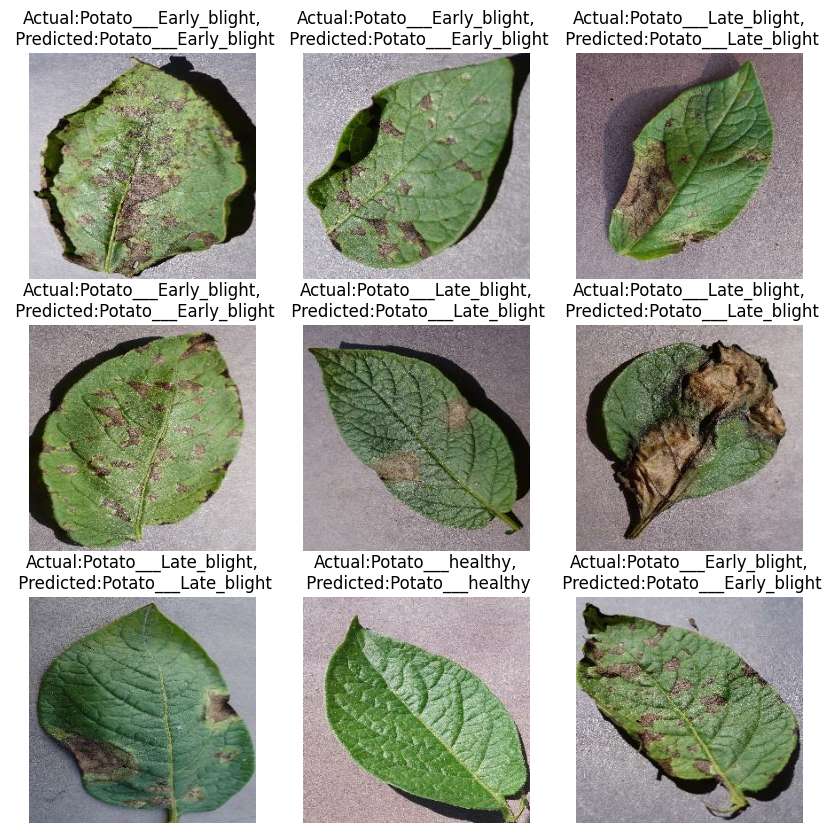

In [35]:
import numpy as np
plt.figure(figsize=(10,10))
for images_batch,labels_batch in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        image =images_batch[i].numpy().astype('uint8')
        label = labels_batch[i].numpy()
    
       
        actual_class=class_names[label]
        batch_prediction=model.predict(images_batch,verbose=0)
        predicted_class=class_names[np.argmax(batch_prediction[i])]
        
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}")
        plt.axis("off")
        plt.imshow(image)
        
        
        